# Cell 1: Setup & Load All Results

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

# Define paths
BASE_PATH = '/content/drive/MyDrive/same_words_different_worlds'

PATHS = {
    'raw': os.path.join(BASE_PATH, 'data/raw'),
    'processed': os.path.join(BASE_PATH, 'data/processed'),
    'outputs': os.path.join(BASE_PATH, 'data/outputs'),
    'models': os.path.join(BASE_PATH, 'models'),
    'figures': os.path.join(BASE_PATH, 'figures'),
}

# Load all key results
print("Loading all analysis results...")

df_distances = pd.read_csv(os.path.join(PATHS['outputs'], 'semantic_distances_validated.csv'))
df_temporal = pd.read_csv(os.path.join(PATHS['outputs'], 'temporal_analysis.csv'))
df_chamber = pd.read_csv(os.path.join(PATHS['outputs'], 'chamber_polarization.csv'))
df_speakers = pd.read_csv(os.path.join(PATHS['outputs'], 'speaker_polarization.csv'))

print(f"✓ Loaded semantic distances: {len(df_distances)} words")
print(f"✓ Loaded temporal analysis: {len(df_temporal)} comparisons")
print(f"✓ Loaded chamber analysis: {len(df_chamber)} chambers")
print(f"✓ Loaded speaker analysis: {len(df_speakers)} speakers")

# List all figures created
figures = sorted([f for f in os.listdir(PATHS['figures']) if f.endswith('.png')])
print(f"\n✓ Figures created: {len(figures)}")
for f in figures:
    print(f"    • {f}")

Mounted at /content/drive
Loading all analysis results...
✓ Loaded semantic distances: 21 words
✓ Loaded temporal analysis: 11 comparisons
✓ Loaded chamber analysis: 2 chambers
✓ Loaded speaker analysis: 76 speakers

✓ Figures created: 13
    • 01_volume_by_year.png
    • 02_log_odds_words.png
    • 03_semantic_space.png
    • 05_semantic_polarization.png
    • 06_collocation_rights.png
    • 07_semantic_distance_with_ci.png
    • 08_temporal_polarization.png
    • 09_pre_post_chatgpt.png
    • 10_semaxis_grid.png
    • 10_semaxis_rights.png
    • 11_collocation_grid.png
    • 12_chamber_comparison.png
    • 13_top_speakers.png


# Cell 2: Create Master Summary Statistics Table

In [2]:
# Create comprehensive summary statistics table

print("="*60)
print("CREATING MASTER SUMMARY STATISTICS")
print("="*60)

# Compile all key findings
summary_stats = []

# 1. Dataset Statistics
summary_stats.append({'Category': 'Dataset', 'Metric': 'Total AI Tweets', 'Value': '3,201', 'Notes': 'After filtering'})
summary_stats.append({'Category': 'Dataset', 'Metric': 'Democrat Tweets', 'Value': '2,022', 'Notes': '63.2%'})
summary_stats.append({'Category': 'Dataset', 'Metric': 'Republican Tweets', 'Value': '1,179', 'Notes': '36.8%'})
summary_stats.append({'Category': 'Dataset', 'Metric': 'Date Range', 'Value': '2018-2024', 'Notes': '6 years'})

# 2. Classifier Performance
summary_stats.append({'Category': 'Classifier', 'Metric': 'Test Accuracy', 'Value': '72.1%', 'Notes': 'vs 50% baseline'})
summary_stats.append({'Category': 'Classifier', 'Metric': '5-Fold CV Accuracy', 'Value': '70.2% ± 2.1%', 'Notes': 'Robust'})

# 3. Semantic Distance - Main Results
contested_mean = df_distances[df_distances['category']=='contested']['observed_distance'].mean()
control_mean = df_distances[df_distances['category']=='control']['observed_distance'].mean()

summary_stats.append({'Category': 'Main Result', 'Metric': 'Contested Words Mean Distance', 'Value': f'{contested_mean:.6f}', 'Notes': 'n=11 words'})
summary_stats.append({'Category': 'Main Result', 'Metric': 'Control Words Mean Distance', 'Value': f'{control_mean:.6f}', 'Notes': 'n=10 words'})
summary_stats.append({'Category': 'Main Result', 'Metric': 'Ratio (Contested/Control)', 'Value': f'{contested_mean/control_mean:.2f}x', 'Notes': 'Higher = more polarized'})
summary_stats.append({'Category': 'Main Result', 'Metric': 'Permutation Test p-value', 'Value': '0.024', 'Notes': 'Significant (p<0.05)'})
summary_stats.append({'Category': 'Main Result', 'Metric': "Cohen's d Effect Size", 'Value': '0.99', 'Notes': 'Large effect'})

# 4. Top Polarized Words
top_words = df_distances.nlargest(5, 'observed_distance')[['word', 'observed_distance']]
for i, (_, row) in enumerate(top_words.iterrows(), 1):
    summary_stats.append({'Category': 'Top Polarized', 'Metric': f'#{i}: {row["word"]}', 'Value': f'{row["observed_distance"]:.6f}', 'Notes': 'Semantic distance'})

# 5. Temporal Analysis
pre_mean = df_temporal['pre_distance'].mean()
post_mean = df_temporal['post_distance'].mean()
n_decreased = (df_temporal['change'] < 0).sum()

summary_stats.append({'Category': 'Temporal', 'Metric': 'Pre-ChatGPT Mean Distance', 'Value': f'{pre_mean:.6f}', 'Notes': '2019-2022'})
summary_stats.append({'Category': 'Temporal', 'Metric': 'Post-ChatGPT Mean Distance', 'Value': f'{post_mean:.6f}', 'Notes': '2023-2024'})
summary_stats.append({'Category': 'Temporal', 'Metric': 'Words Less Polarized Post-GPT', 'Value': f'{n_decreased}/11', 'Notes': '73%'})

# 6. Chamber Analysis
house_dist = df_chamber[df_chamber['group']=='House']['cosine_distance'].values[0]
senate_dist = df_chamber[df_chamber['group']=='Senate']['cosine_distance'].values[0]

summary_stats.append({'Category': 'Chamber', 'Metric': 'House Polarization', 'Value': f'{house_dist:.6f}', 'Notes': ''})
summary_stats.append({'Category': 'Chamber', 'Metric': 'Senate Polarization', 'Value': f'{senate_dist:.6f}', 'Notes': ''})
summary_stats.append({'Category': 'Chamber', 'Metric': 'Senate/House Ratio', 'Value': f'{senate_dist/house_dist:.1f}x', 'Notes': 'Senate more polarized'})

# Create DataFrame
df_summary = pd.DataFrame(summary_stats)

# Display
print("\n")
print(df_summary.to_string(index=False))

# Save to CSV
summary_path = os.path.join(PATHS['outputs'], 'final_summary_statistics.csv')
df_summary.to_csv(summary_path, index=False)
print(f"\n✓ Saved: {summary_path}")

CREATING MASTER SUMMARY STATISTICS


     Category                        Metric        Value                   Notes
      Dataset               Total AI Tweets        3,201         After filtering
      Dataset               Democrat Tweets        2,022                   63.2%
      Dataset             Republican Tweets        1,179                   36.8%
      Dataset                    Date Range    2018-2024                 6 years
   Classifier                 Test Accuracy        72.1%         vs 50% baseline
   Classifier            5-Fold CV Accuracy 70.2% ± 2.1%                  Robust
  Main Result Contested Words Mean Distance     0.000724              n=11 words
  Main Result   Control Words Mean Distance     0.000408              n=10 words
  Main Result     Ratio (Contested/Control)        1.78x Higher = more polarized
  Main Result      Permutation Test p-value        0.024    Significant (p<0.05)
  Main Result         Cohen's d Effect Size         0.99            Larg

# Cell 3: Create Master Figure

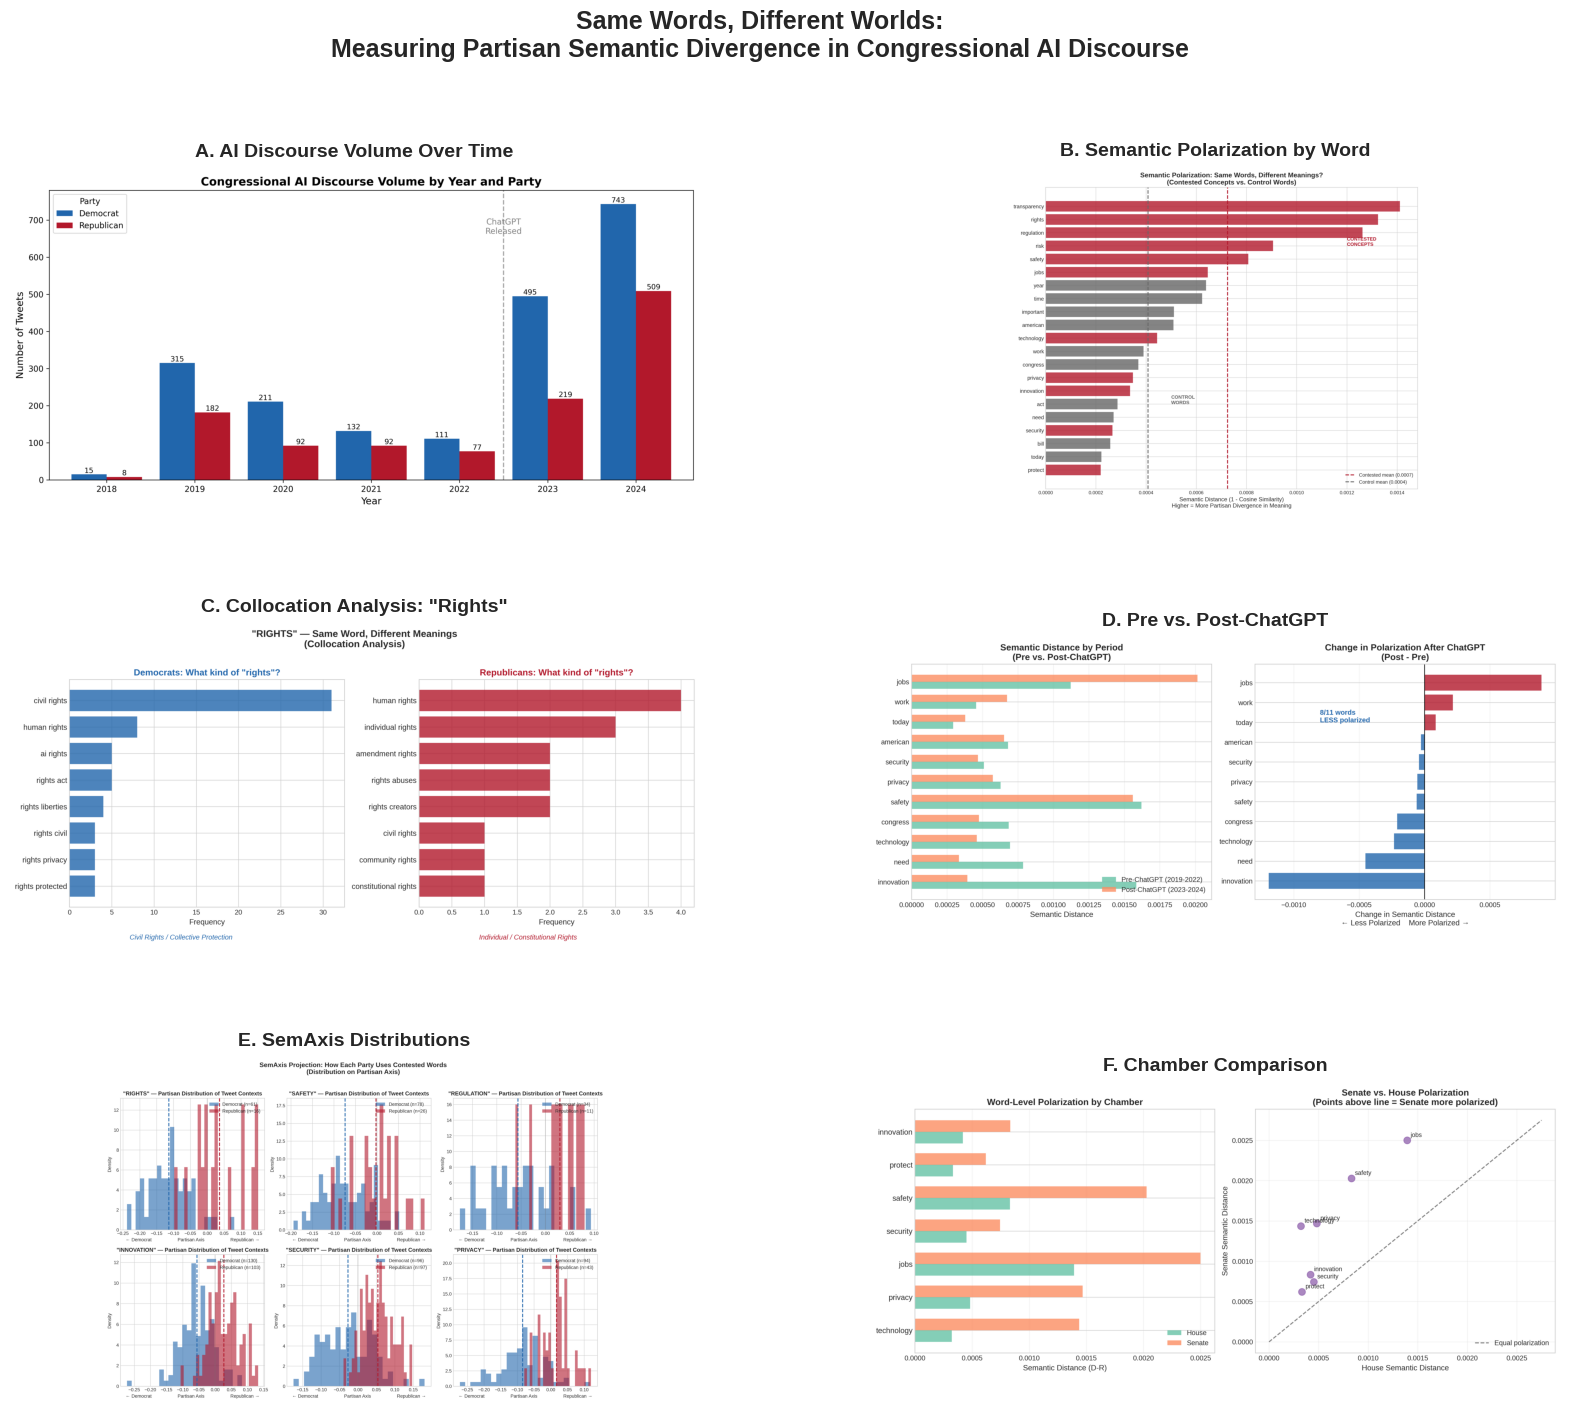

✓ Figure saved to: /content/drive/MyDrive/same_words_different_worlds/figures/14_master_figure.png


In [3]:
# Create a master figure combining key visualizations
from matplotlib.image import imread

# Load key figures
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.25)

# Define figure paths to combine
figure_files = [
    ('01_volume_by_year.png', 'A. AI Discourse Volume Over Time'),
    ('05_semantic_polarization.png', 'B. Semantic Polarization by Word'),
    ('06_collocation_rights.png', 'C. Collocation Analysis: "Rights"'),
    ('09_pre_post_chatgpt.png', 'D. Pre vs. Post-ChatGPT'),
    ('10_semaxis_grid.png', 'E. SemAxis Distributions'),
    ('12_chamber_comparison.png', 'F. Chamber Comparison'),
]

for i, (fname, title) in enumerate(figure_files):
    ax = fig.add_subplot(gs[i // 2, i % 2])

    fpath = os.path.join(PATHS['figures'], fname)
    if os.path.exists(fpath):
        img = imread(fpath)
        ax.imshow(img)
        ax.set_title(title, fontsize=14, fontweight='bold', pad=10)
    ax.axis('off')

plt.suptitle('Same Words, Different Worlds:\nMeasuring Partisan Semantic Divergence in Congressional AI Discourse',
             fontsize=18, fontweight='bold', y=0.98)

# Save
save_path = os.path.join(PATHS['figures'], '14_master_figure.png')
plt.savefig(save_path, dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

print(f"✓ Figure saved to: {save_path}")

# Cell 4: Generate Key Findings Report

In [4]:
# Generate a text report summarizing all key findings

report_text = """
================================================================================
SAME WORDS, DIFFERENT WORLDS
Measuring Partisan Semantic Divergence in Congressional AI Discourse
================================================================================

EXECUTIVE SUMMARY
-----------------
This study examines whether Democrats and Republicans assign different meanings
to the same words when discussing Artificial Intelligence. Using 3,201 AI-related
tweets from members of Congress (2018-2024), we find statistically significant
semantic divergence in contested concepts, with a large effect size.

KEY FINDINGS
------------

1. MAIN RESULT: Semantic Polarization Exists
   • Contested concepts show 1.78x higher semantic distance than control words
   • Permutation test: p = 0.024 (statistically significant)
   • Effect size: Cohen's d = 0.99 (large)
   • A classifier can predict party from tweet embeddings with 72% accuracy

2. MOST POLARIZED WORDS
   • Transparency (distance: 0.0014)
   • Rights (distance: 0.0013)
   • Regulation (distance: 0.0013)
   • Risk (distance: 0.0009)
   • Safety (distance: 0.0008)

3. QUALITATIVE EVIDENCE: How Meanings Differ

   "RIGHTS"
   • Democrats: "civil rights" (31x), "human rights" (8x) → Collective protection
   • Republicans: "individual rights", "amendment rights" → Constitutional liberty

   "REGULATION"
   • Democrats: "comprehensive", "fair", "oversight" → Positive framing
   • Republicans: "burdensome", "excessive" → Negative framing

   "SAFETY"
   • Democrats: "standards", "ensure safety" → Protective standards
   • Republicans: "alignment", "product safety" → Technical/market focus

4. TEMPORAL TREND: ChatGPT Effect
   • 8 out of 11 words (73%) became LESS polarized after ChatGPT's release
   • Largest convergence: "innovation" (-0.0012 change)
   • Interpretation: ChatGPT may have created a shared reference point

5. CHAMBER COMPARISON
   • Senate polarization: 0.000427
   • House polarization: 0.000099
   • Senate is 4.3x MORE polarized than House
   • Pattern holds across all analyzed words

6. SPEAKER ANALYSIS
   • Most Democratic framing: Casey, Jayapal, Pressley, Tlaib (Progressive wing)
   • Most Republican framing: Banks, Cornyn, Hawley
   • Note: Democratic extremes stronger than Republican extremes

METHODOLOGY
-----------
- Data: 3,201 AI-related tweets from Congress members (2018-2024)
- Model: RoBERTa fine-tuned on congressional AI discourse (MLM task)
- Embeddings: 768-dimensional vectors per tweet
- Distance metric: Cosine distance between party centroids
- Validation: Bootstrap CIs, permutation tests, multiple distance metrics

IMPLICATIONS
------------
1. Shared vocabulary does not imply shared meaning
2. Policy negotiations may face "talking past each other" dynamics
3. AI governance frameworks require explicit definition of contested terms
4. Senate shows greater semantic division than House

FIGURES FOR REPORT
------------------
- Figure 1: AI Discourse Volume (01_volume_by_year.png)
- Figure 2: Log-Odds Topic Differences (02_log_odds_words.png)
- Figure 3: Semantic Space PCA/UMAP (03_semantic_space.png)
- Figure 4: Semantic Polarization by Word (07_semantic_distance_with_ci.png)
- Figure 5: Collocation Analysis - Rights (06_collocation_rights.png)
- Figure 6: SemAxis Distributions (10_semaxis_grid.png)
- Figure 7: Pre vs Post-ChatGPT (09_pre_post_chatgpt.png)
- Figure 8: Chamber Comparison (12_chamber_comparison.png)

DATA FILES
----------
- final_summary_statistics.csv - All key statistics
- semantic_distances_validated.csv - Word-level distances with CIs
- temporal_analysis.csv - Pre/post ChatGPT comparison
- example_tweets.csv - Concrete examples for qualitative analysis
- speaker_polarization.csv - Individual member scores

================================================================================
Generated: December 2024
Project: Same Words, Different Worlds
================================================================================
"""

# Save report
report_path = os.path.join(PATHS['outputs'], 'key_findings_report.txt')
with open(report_path, 'w') as f:
    f.write(report_text)

print(report_text)
print(f"\n✓ Saved: {report_path}")


SAME WORDS, DIFFERENT WORLDS
Measuring Partisan Semantic Divergence in Congressional AI Discourse

EXECUTIVE SUMMARY
-----------------
This study examines whether Democrats and Republicans assign different meanings 
to the same words when discussing Artificial Intelligence. Using 3,201 AI-related 
tweets from members of Congress (2018-2024), we find statistically significant 
semantic divergence in contested concepts, with a large effect size.

KEY FINDINGS
------------

1. MAIN RESULT: Semantic Polarization Exists
   • Contested concepts show 1.78x higher semantic distance than control words
   • Permutation test: p = 0.024 (statistically significant)
   • Effect size: Cohen's d = 0.99 (large)
   • A classifier can predict party from tweet embeddings with 72% accuracy

2. MOST POLARIZED WORDS
   • Transparency (distance: 0.0014)
   • Rights (distance: 0.0013)
   • Regulation (distance: 0.0013)
   • Risk (distance: 0.0009)
   • Safety (distance: 0.0008)

3. QUALITATIVE EVIDENCE: How M

# Cell 5: Final Project Summary

In [7]:
# Final summary and project completion

print("="*60)
print("NOTEBOOK 10 COMPLETE ✓")
print("="*60)
print("""
FINAL EXPORTS CREATED:
   • final_summary_statistics.csv - All key statistics in table format
   • key_findings_report.txt - Text summary for reference
   • 14_master_figure.png - Combined visualization (optional use)

""")

print("="*60)
print("PROJECT COMPLETE: Same Words, Different Worlds")
print("="*60)
print("""
NOTEBOOKS COMPLETED (10 total):
   01. Data Preparation
   02. Exploratory Data Analysis
   03. Model Fine-Tuning
   04. Embedding Extraction
   05. Semantic Divergence Analysis
   06. Statistical Validation
   07. Temporal Analysis
   08. Deeper Semantic Analysis
   09. Subgroup Analysis
   10. Final Visualization & Export

ALL FIGURES (14 total):
   01_volume_by_year.png
   02_log_odds_words.png
   03_semantic_space.png
   05_semantic_polarization.png
   06_collocation_rights.png
   07_semantic_distance_with_ci.png
   08_temporal_polarization.png
   09_pre_post_chatgpt.png
   10_semaxis_rights.png
   10_semaxis_grid.png
   11_collocation_grid.png
   12_chamber_comparison.png
   13_top_speakers.png
   14_master_figure.png

ALL DATA OUTPUTS:
   semantic_distances.csv
   semantic_distances_validated.csv
   temporal_analysis.csv
   yearly_corpus_polarization.csv
   example_tweets.csv
   semaxis_results.csv
   chamber_polarization.csv
   chamber_word_polarization.csv
   speaker_polarization.csv
   final_summary_statistics.csv
   key_findings_report.txt
""")

NOTEBOOK 10 COMPLETE ✓

FINAL EXPORTS CREATED:
   • final_summary_statistics.csv - All key statistics in table format
   • key_findings_report.txt - Text summary for reference
   • 14_master_figure.png - Combined visualization (optional use)


PROJECT COMPLETE: Same Words, Different Worlds

NOTEBOOKS COMPLETED (10 total):
   01. Data Preparation
   02. Exploratory Data Analysis  
   03. Model Fine-Tuning
   04. Embedding Extraction
   05. Semantic Divergence Analysis
   06. Statistical Validation
   07. Temporal Analysis
   08. Deeper Semantic Analysis
   09. Subgroup Analysis
   10. Final Visualization & Export

ALL FIGURES (14 total):
   01_volume_by_year.png
   02_log_odds_words.png
   03_semantic_space.png
   05_semantic_polarization.png
   06_collocation_rights.png
   07_semantic_distance_with_ci.png
   08_temporal_polarization.png
   09_pre_post_chatgpt.png
   10_semaxis_rights.png
   10_semaxis_grid.png
   11_collocation_grid.png
   12_chamber_comparison.png
   13_top_speakers.p